# Verarbeitung und Darstellung der Messdaten


## Import all libraries and load data as pandas dataframe


Gruppenmitglieder: Moritz Mattes, Elias Maier, Hauke Döllefeld

In [1]:
#import libraries
import pandas as pd
import numpy as np
import scipy.signal as sci
import matplotlib.pyplot as plt

Text(0, 0.5, 'Acceleration [G]')

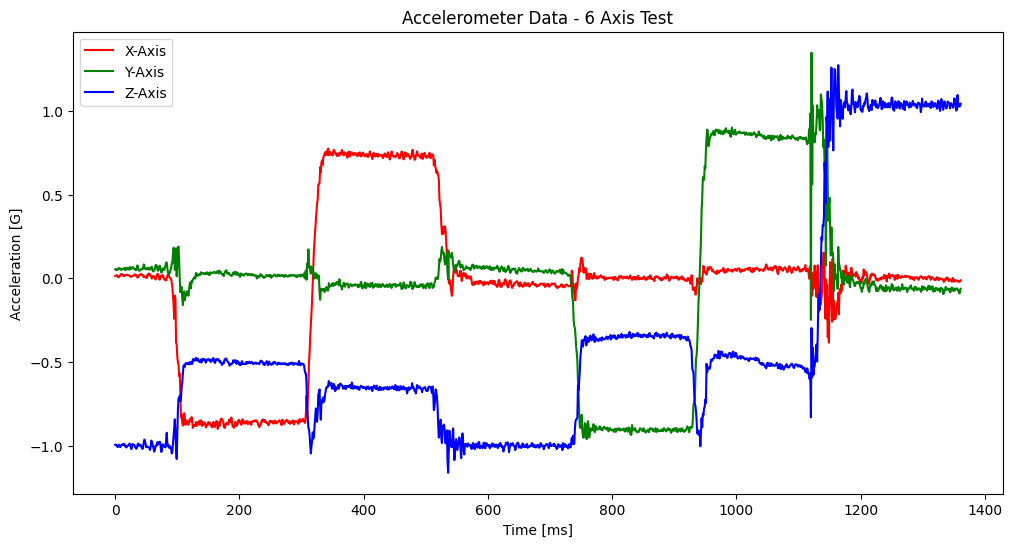

In [2]:
# Aufgabe 5 (Drehen in alle 6 Richtungen)
df = pd.read_csv('Daten/Lab1_IMU_6Achsentest.csv', sep=';')

# Plotting the accelerometer data
plt.figure(figsize=(12, 6))
plt.plot(df['x'], label='X-Axis', color='r')
plt.plot(df['y'], label='Y-Axis', color='g')
plt.plot(df['z'], label='Z-Axis', color='b')
plt.xlabel('Time [ms]')
plt.legend()
plt.title('Accelerometer Data - 6 Axis Test')
plt.ylabel('Acceleration [G]')


Text(0.5, 0, 'Time [ms]')

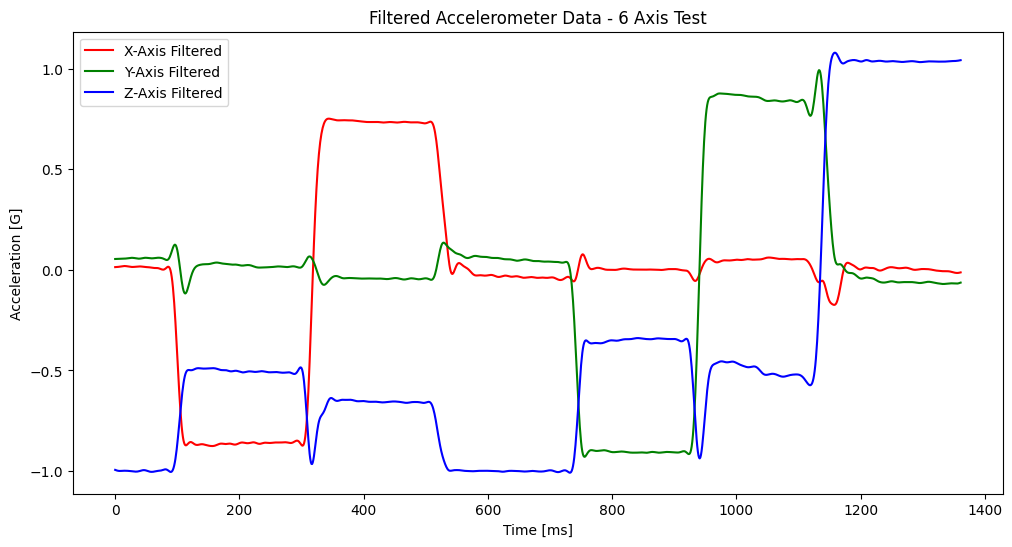

In [3]:
# Aufgabe 6 (Filterung der Daten)
b, a = sci.butter(4, 0.1) # Butterworth filter coefficients
df_filtered = df.copy()
df_filtered['x'] = sci.filtfilt(b, a, df['x'])
df_filtered['y'] = sci.filtfilt(b, a, df['y'])
df_filtered['z'] = sci.filtfilt(b, a, df['z'])

# Darstellen der gefilterten Daten gegen die ungefilterten Daten
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['x'], label='X-Axis Filtered', color='r')
plt.plot(df_filtered['y'], label='Y-Axis Filtered', color='g')
plt.plot(df_filtered['z'], label='Z-Axis Filtered', color='b')
plt.legend()
plt.title('Filtered Accelerometer Data - 6 Axis Test')
plt.ylabel('Acceleration [G]')
plt.xlabel('Time [ms]')


Der eingesetzte Butterworth-Filter 4. Ordnung hat erreicht, dass die hochfrequenten Anteile des Signals deutlich reduziert wurden. Dadurch ist das Signal deutlich geglättet und Rauschen wurde entfernt. Da dieser Filter eine hohe Flankensteilheit besitzt, werden die niederfrequenten Anteile des Signals kaum beeinflusst, was zu einer guten Signalqualität führt.

<Axes: title={'center': 'Accelerometer Test'}, xlabel='Time [s]', ylabel='Acceleration in g'>

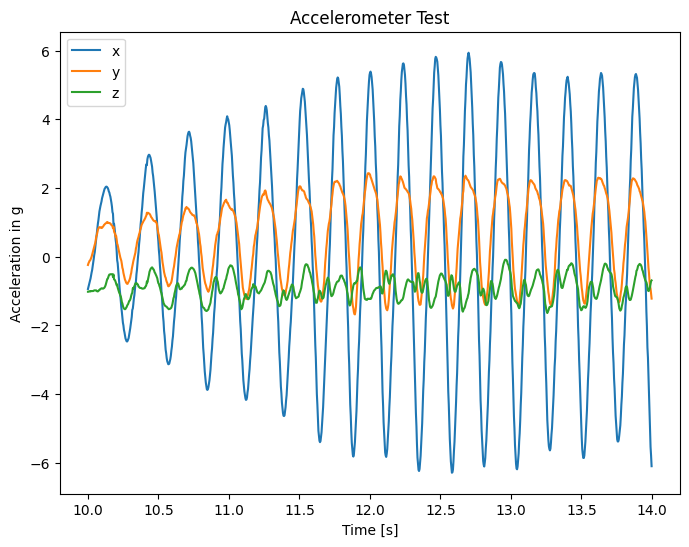

In [ ]:
# Aufgabe 8 (a)
# Read the data from the csv file
df2 = pd.read_csv("Daten/Lab1_10s-1Achse_3Anlauf.csv", sep=";") # read in csv file

df2.columns = ["x", "y", "z", "unused"] # rename columns
df2 = df2.drop(columns=["unused"]) # drop unused column
# Add time column in seconds
df2.insert(0, "time_ms", np.arange(0, len(df2))*3.6983)

df2["time_s"] = df2["time_ms"] / 1000.0 # Change time to seconds
df2 = df2[(df2['time_s'] >= 10) & (df2['time_s'] <= 14)] # limit data to 10s - 14s

# display data
df2.plot(x = 'time_s', y = ['x', 'y', 'z'], ylabel='Acceleration in g', 
        xlabel='Time [s]', figsize= [8, 6], title="Accelerometer Test")


### Kommentar zum Ergebnis aus Aufgabe 8 (a)
Die Visualisierung zeigt die Aufnahme der Daten mit richtig eingestellter Abtastfrequenz und maximal messbaren Größen in G sowie der Codeanpassung in Lab1Code1 (Normierung von 1024 auf 256, da ansonsten bei einer Beschleunigung von 8G nur ein Viertel ausgegeben werden würde, also 2G). Folglich sind Aufgabe 9 und 12 schon implizit erledigt. Wenn die Messparameter nicht richtig gewählt worden wären, wären die Daten abgeschnitten oder hätten Aliasing-Effekte gezeigt.

In [5]:
# Aufgabe 10 (Rechnerisches bestimmen der Messfrequenz)

# Calculate time differences between consecutive samples
time_diffs = df2['time_ms'].diff()

# Mean time difference in milliseconds
mean_time_diff_ms = time_diffs.mean()

# Calculate sampling frequency in Hz
sampling_frequency = 1000 / mean_time_diff_ms  # in Hz

print(f"Mittlere Zeitdifferenz: {mean_time_diff_ms:.2f} ms")
print(f"Messfrequenz: {sampling_frequency:.2f} Hz")

# Alternative: Total time divided by number of samples
total_time_s = (df2['time_ms'].iloc[-1] - df2['time_ms'].iloc[0]) / 1000
num_samples = len(df2)
sampling_frequency_alt = (num_samples - 1) / total_time_s

print(f"\nAlternative Berechnung:")
print(f"Gesamtzeit: {total_time_s:.2f} s")
print(f"Anzahl Samples: {num_samples}")
print(f"Messfrequenz: {sampling_frequency_alt:.2f} Hz")

Mittlere Zeitdifferenz: 3.70 ms
Messfrequenz: 270.39 Hz

Alternative Berechnung:
Gesamtzeit: 4.00 s
Anzahl Samples: 1082
Messfrequenz: 270.39 Hz


Zu der obigen Berechnung muss gesagt werden, dass die Messung bei einer deutlich höheren Abtastfrequenz als 252 Hz durchgeführt wurde (ca. 800 Hz). Daher ist die Visualisierung der mittleren 4 Sekunden schon ausreichend glatt und es sind keine Aliasing-Effekte zu erkennen. Wäre die Abtastfrequenz jedoch wirklich nur 252 Hz, so wären Aliasing-Effekte deutlich sichtbar gewesen. Dies ist auf das Nyquist-Shannon-Abtasttheorem zurückzuführen, welches besagt, dass die Abtastfrequenz mindestens doppelt so hoch wie die höchste Frequenzkomponente des Signals sein muss, um eine genaue Rekonstruktion zu gewährleisten.

# Filter acceleration data applying different filter techniques
## Bandpass filter (Butterworth 4. order)

Wir möchten einen Filter verwende, der das Signal nicht verschiebt, demnach einen zero-Phase Filter. Scipy bietet diese Option mit der _filtfilt()_ Methode an. Dieser verwendet zwei _Infinite Impuls Response_ Filter hintereinander geschaltet, jedoch wird der erste vorwärts und der zweite rückwärts angewandt, um keine Phasenverschiebung zu erhalten.

Dies ist auch in folgender Abbildung zu erkennen. Die gestrichelte rote Line stellt einen Filter dar, welcher das Signal filtert und störende Frequenzen entfernt, jedoch ist dieser um eine Phase verschoben zum eigentlichen Signal. Die rote Line ist die zweite Anwendung des Filters. Würde man den zweiten Filter jedoch rückwärts anwenden, würde man die schwarze Linie und somit das Ergebnis der _filtfilt()_ methode erhalten.



![Unterschied zwischen verschiedenen Filtertypen](bilder/zeroPhase.png)

In [6]:
# Setting up a butterworth filter 

def butter_bandpass(lowcut,fs,order=4):
    
    # nyq: Nyquist Theorem
    nyq = 0.5 * fs
    # low is calculated in relation to cutoff frequency and sampling frequency
    low = lowcut / nyq
    
    #order = 4
    
    b, a = sci.butter(order, [low], 'lowpass', analog=False)
    
    return b, a

In [7]:
def butter_bandpass_filter(signal, lowcut, fs, order=4):
    #use filtfilt for a zero-phase filtering
    b, a = butter_bandpass(lowcut,fs, order)
    y = sci.filtfilt(b, a, signal, axis = 0)
    return y